<a href="https://colab.research.google.com/github/sp2743/datamining-samplequestion/blob/main/FP_Growth_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement FP-Tree Construction

    1.1 Accept a list of transactions (each transaction is a list of items). [10]
    
    1.2 Compute item frequencies and remove infrequent items (based on a minimum support threshold). [10]
    
    1.3 Create a Python class to represent FP-Tree. [20]
    
    1.4 Sort each transaction based on frequency and insert it into the FP-Tree structure. [40]
    
    1.5 Print the FP-Tree structure in a readable format. [20]
    
    

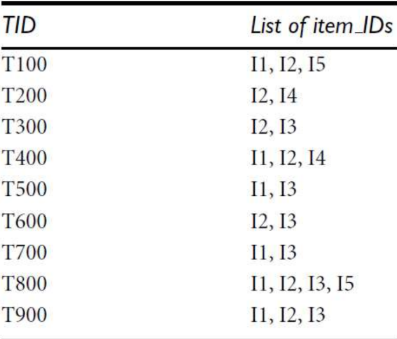

Example: A transaction dataset given as follows:  
       
[Min_sup = 2]

Generated FP-Tree (Just for understading purpose. You are not required to code for this representation.)
<img height='4px'> ![image.png](attachment:image.png) </img>

### Desired output
    I2:7 -> I1:4 -> I5:1
    I2:7 -> I1:4 -> I3:2 -> I5:1
    I2:7 -> I1:4 -> I4:1
    I2:7 -> I3:2
    I2:7 -> I4:1
    I1:1 -> I3:2
    

In [2]:
# 1.1 Accept a list of transactions (each transaction is a list of items)
n = int(input("Enter the number of transactions: "))
transactions = {}  # Dictionary to store transaction ID and itemset

for i in range(n):
    transaction_id = input(f"Enter the transaction ID for transaction {i+1}: ")
    m = int(input(f"Enter the number of items for transaction {transaction_id}: "))

    items = set(input(f"Enter {m} items separated by space: ").split())

    transactions[transaction_id] = items  # Store transaction ID and itemset

# Print transactions dictionary
print("\nTransactions Dictionary:")
print(transactions)

Enter the number of transactions: 9
Enter the transaction ID for transaction 1: T100
Enter the number of items for transaction T100: 3
Enter 3 items separated by space: I1 I2 I5
Enter the transaction ID for transaction 2: T200
Enter the number of items for transaction T200: 2
Enter 2 items separated by space: I2 I4
Enter the transaction ID for transaction 3: T300
Enter the number of items for transaction T300: 2
Enter 2 items separated by space: I2 I3
Enter the transaction ID for transaction 4: T400
Enter the number of items for transaction T400: 3
Enter 3 items separated by space: I1 I2 I4
Enter the transaction ID for transaction 5: T500
Enter the number of items for transaction T500: 2
Enter 2 items separated by space: I1 I3
Enter the transaction ID for transaction 6: T600
Enter the number of items for transaction T600: 2
Enter 2 items separated by space: I2 I3
Enter the transaction ID for transaction 7: T700
Enter the number of items for transaction T700: 2
Enter 2 items separated b

In [13]:
# 1.2 Compute item frequencies and remove infrequent items (based on a minimum support threshold)
from collections import defaultdict

def find_1frequent_itemset(transactions, min_support):
    item_counts = defaultdict(int)

    # Count occurrences of each item
    for items in transactions.values():
        for item in items:
            item_counts[item] += 1

    # Filter items that meet min_support threshold and sort by frequency
    frequent_items = sorted(
        [(item, count) for item, count in item_counts.items() if count >= min_support],key=lambda x: -x[1]
    )

    print("\nItem Frequencies:")
    for item, count in sorted(item_counts.items(), key=lambda x: -x[1]):
        print(f"{item}: {count}")

    return frequent_items, item_counts

min_support = int(input("\nEnter minimum support threshold: "))
one_frequent_itemset,item_counts = find_1frequent_itemset(transactions, min_support)
print("\nOne Frequent Itemset:")
print(one_frequent_itemset)


Enter minimum support threshold: 2

Item Frequencies:
I2: 7
I1: 6
I3: 6
I5: 2
I4: 2

One Frequent Itemset:
[('I2', 7), ('I1', 6), ('I3', 6), ('I5', 2), ('I4', 2)]


In [14]:
# 1.3 Create a Python class to represent FP-Tree.
class FPTreeNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}
        self.node_link = None

    def increment(self, count):
        self.count += count

class FPTree:
    def __init__(self):
        self.root = FPTreeNode(None, 1, None)
        self.header_table = {}

    def insert_transaction(self, transaction, count=1):
        current_node = self.root
        for item in transaction:
            if item in current_node.children:
                current_node.children[item].increment(count)
            else:
                new_node = FPTreeNode(item, count, current_node)
                current_node.children[item] = new_node

                # Update header table (link nodes of the same item)
                if item in self.header_table:
                    last_node = self.header_table[item]
                    while last_node.node_link:
                        last_node = last_node.node_link
                    last_node.node_link = new_node
                else:
                    self.header_table[item] = new_node

            current_node = current_node.children[item]

    def print_tree(self, node=None, path=[]):
        if node is None:
            node = self.root

        for child in node.children.values():
            new_path = path + [f"{child.item}:{child.count}"]
            print(" -> ".join(new_path))
            self.print_tree(child, new_path)

In [18]:
# 1.4 Sort each transaction based on frequency and insert it into the FP-Tree structure
filtered_transactions = []
frequent_items_set = {item for item, _ in one_frequent_itemset}
sorted_item_order = {item: idx for idx, (item, _) in enumerate(one_frequent_itemset)}

for items in transactions.values():
    filtered_items = [item for item in items if item in frequent_items_set]

    sorted_items = sorted(filtered_items, key=lambda item: sorted_item_order[item])

    if sorted_items:  # Ignore empty transactions
        filtered_transactions.append(sorted_items)


# print("\nFP-Tree:")
# fp_tree.print_tree()

In [19]:
# 1.5 Print the FP-Tree structure in a readable format
fp_tree = FPTree()
for transaction in filtered_transactions:
    fp_tree.insert_transaction(transaction)

print("\nFP-Tree Structure:")
fp_tree.print_tree()


FP-Tree Structure:
I2:7
I2:7 -> I1:4
I2:7 -> I1:4 -> I5:1
I2:7 -> I1:4 -> I4:1
I2:7 -> I1:4 -> I3:2
I2:7 -> I1:4 -> I3:2 -> I5:1
I2:7 -> I4:1
I2:7 -> I3:2
I1:2
I1:2 -> I3:2
